<h1 align=center style="font-family: 'Times New Roman', sans-serif; color: darkblue">Inteligencia Artificial</h1>
<h2 align=center style="font-family: 'Times New Roman', sans-serif; color: darkblue">Practica Grupal</h2>
<h3 align=center style="font-family: 'Times New Roman', sans-serif; color: darkblue">Jhosua Callejas Ramos</h3>

En este cuaderno, entrenaremos una CNN Resnet-50 en el conjunto de datos [Food-101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) dataset.

<p style="color: darkblue">El conjunto de datos incluye 101 categorías de alimentos con cada clase teniendo 1000 imágenes. 

<h3><p style="color: darkblue">IMPORTACION LIBRERIAS</p></h3>

<p style="color: darkblue">Importamos la libreria FastAI y otras dependencias que utilizaremos para netrenar nuestra Red Neuronal Convunacional o CNN

In [1]:
import pandas as pd
import requests
import glob
from io import BytesIO
import numpy as np
import os
import shutil
import pprint
import json

In [2]:
from fastai import *
from fastai.vision import *

<h3><p style="color: darkblue">CARGA DE DATOS</p></h3>

<p style="color: darkblue">Primero, defino la ruta base del conjunto de datos Food-101:

In [ ]:
base_path = 'food-101'

<p style="color: darkblue">Luego, especifico la ruta donde se encuentran las imágenes:

In [6]:
path = ('food-101/images')

<p style="color: darkblue">Después, creo un objeto ImageDataBunch para manejar mis datos de imágenes. Aquí es donde configuro algunos parámetros importantes

In [7]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=8, bs=64).normalize(imagenet_stats)

<p style="color: darkblue">Verifico algunos detalles del conjunto de datos, como las clases que contiene, el número total de clases, y la cantidad de imágenes en los conjuntos de entrenamiento y validación:

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  'gyoza',
  'hamburger',
  'hot_and_sour_soup',
  'hot_dog',
  'huevos_rancheros',
  'hummu

<h3><p style="color: darkblue">ENTRENAMIENOT DEL MODELO

<p style="color: darkblue">creo un modelo de red neuronal convolucional (CNN) utilizando ResNet-34 preentrenado y especifico que quiero utilizar la métrica de tasa de error para evaluar el rendimiento del modelo

In [9]:
learn = create_cnn(data, models.resnet34, metrics=error_rate,pretrained=True)

<p style="color: darkblue">Luego, utilizo el método lr_find() para encontrar la tasa de aprendizaje más adecuada. Esto ayuda a determinar a qué velocidad debe aprender el modelo durante el entrenamiento

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


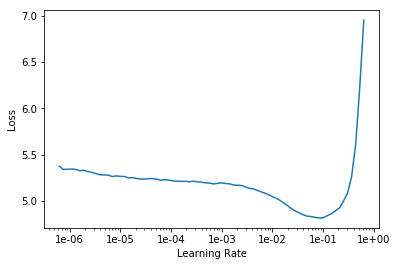

In [10]:
learn.lr_find()
learn.recorder.plot()

<p style="color: darkblue">Esto genera un gráfico que muestra la pérdida (loss) en función de diferentes tasas de aprendizaje. La idea es elegir una tasa de aprendizaje que esté en la parte descendente del gráfico, justo antes de que la pérdida comience a aumentar nuevamente.

Una vez que he encontrado la tasa de aprendizaje adecuada, la defino explícitamente. En este caso, establezco la tasa de aprendizaje a 1e-2

In [12]:
lr = 1e-2

<p style="color: darkblue">Finalmente, entreno el modelo utilizando el método fit_one_cycle, que es una técnica de entrenamiento que varía la tasa de aprendizaje de manera cíclica. Aquí entreno el modelo durante 8 épocas con la tasa de aprendizaje que he definido

In [13]:
learn.fit_one_cycle(8 , lr)

epoch,train_loss,valid_loss,error_rate
1,1.999872,1.817976,0.470594
2,2.006050,1.872519,0.483911
3,1.893473,1.697205,0.441634
4,1.778546,1.497193,0.388960
5,1.572615,1.307390,0.342030
6,1.475655,1.188818,0.310990
7,1.294712,1.108866,0.293218
8,1.248308,1.094019,0.288564


<p style="color: darkblue">Primero, defino el nombre del modelo que estoy utilizando, en este caso, resnet34

In [14]:
model_name="resnet34"

<p style="color: darkblue">Luego, guardo el estado actual del modelo con un nombre específico para poder cargarlo más tarde si es necesario

In [15]:
learn.save(f'{model_name}-stage-1')

<p style="color: darkblue">Después, cargo el estado guardado del modelo para continuar entrenándolo o evaluándolo

In [16]:
learn.load(f'{model_name}-stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (80800 items)
[Category carrot_cake, Category carrot_cake, Category carrot_cake, Category carrot_cake, Category carrot_cake]...
Path: ../data/food-101/images
x: ImageItemList (80800 items)
[Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 378)]...
Path: ../data/food-101/images;

Valid: LabelList
y: CategoryList (20200 items)
[Category chicken_wings, Category ice_cream, Category cheese_plate, Category baby_back_ribs, Category onion_rings]...
Path: ../data/food-101/images
x: ImageItemList (20200 items)
[Image (3, 512, 512), Image (3, 512, 384), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512)]...
Path: ../data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(in

<p style="color: darkblue">A continuación, "descongelo" el modelo. Esto significa que desbloqueo todas las capas del modelo para que sus parámetros puedan ser actualizados durante el entrenamiento

In [17]:
learn.unfreeze()

<p style="color: darkblue">Vuelvo a usar el método lr_find() para encontrar la mejor tasa de aprendizaje, pero esta vez especifico un rango de tasas de aprendizaje más amplio, desde 1e-9 hasta 1e-3

In [18]:
learn.lr_find(start_lr=1e-09, end_lr=1e-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


<p style="color: darkblue">Finalmente, genero un gráfico para visualizar las pérdidas en función de la tasa de aprendizaje, omitiendo los últimos 10 puntos del gráfico para enfocarme en la parte más relevante de la curva

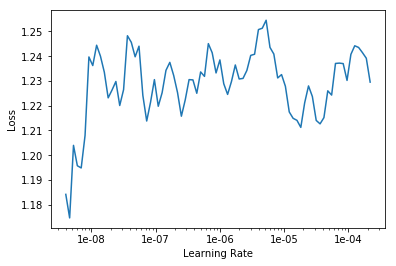

In [19]:
learn.recorder.plot(skip_end=10)

<p style="color: darkblue">Utilizo el método fit_one_cycle para entrenar el modelo durante 5 épocas, especificando un rango de tasas de aprendizaje de 1e-8 a 1e-4

In [20]:
learn.fit_one_cycle(5, max_lr=slice(1e-8,1e-4))

epoch,train_loss,valid_loss,error_rate
1,1.253053,1.089987,0.286584
2,1.215632,1.080179,0.284901
3,1.177106,1.072547,0.282871
4,1.183173,1.069058,0.282376
5,1.180598,1.069759,0.281436


<p style="color: darkblue">Aquí puedo ver el progreso del entrenamiento en cada época, con la pérdida de entrenamiento (train_loss), la pérdida de validación (valid_loss) y la tasa de error (error_rate) mejorando con cada época.

<p style="color: darkblue">Después de finalizar el entrenamiento, guardo el estado actual del modelo como "stage-2"

In [21]:
learn.save(f'{model_name}-stage-2')

<p style="color: darkblue">Finalmente, si necesito continuar entrenando o evaluando el modelo más tarde, puedo cargar este estado guardado

In [22]:
learn.load(f'{model_name}-stage-2');

<h3><p style="color: darkblue">INTERPRETACION DEL MODELO

<p style="color: darkblue">Primero, cargo el modelo que guardé anteriormente en "stage-2":

In [23]:
learn.load(f'{model_name}-stage-2');


<p style="color: darkblue">Luego, creo una instancia de ClassificationInterpretation para analizar los resultados de mi modelo:

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

<p style="color: darkblue">Finalmente, grafico las 9 predicciones con mayores pérdidas usando el método plot_top_losses. Esto me ayuda a entender en qué ejemplos mi modelo tuvo más dificultad y dónde puede estar cometiendo errores. Especifico el tamaño de la figura para que sea más grande y clara:

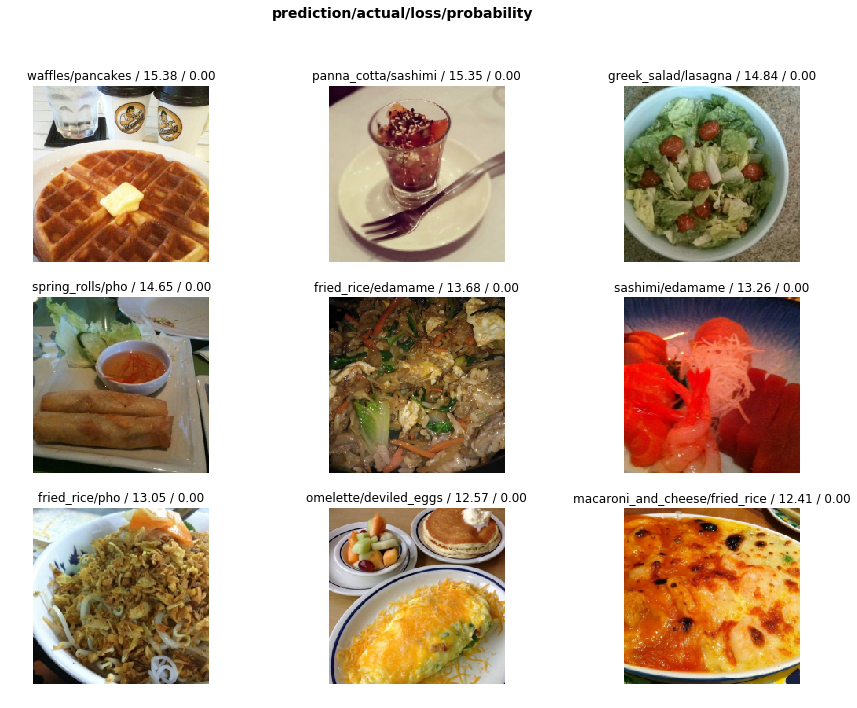

In [25]:
interp.plot_top_losses(9, figsize=(15,11))

<p style="color: darkblue">Después de analizar las pérdidas, también quiero ver la matriz de confusión para entender mejor cómo está funcionando mi modelo en todas las clases. Para ello, utilizo el método plot_confusion_matrix

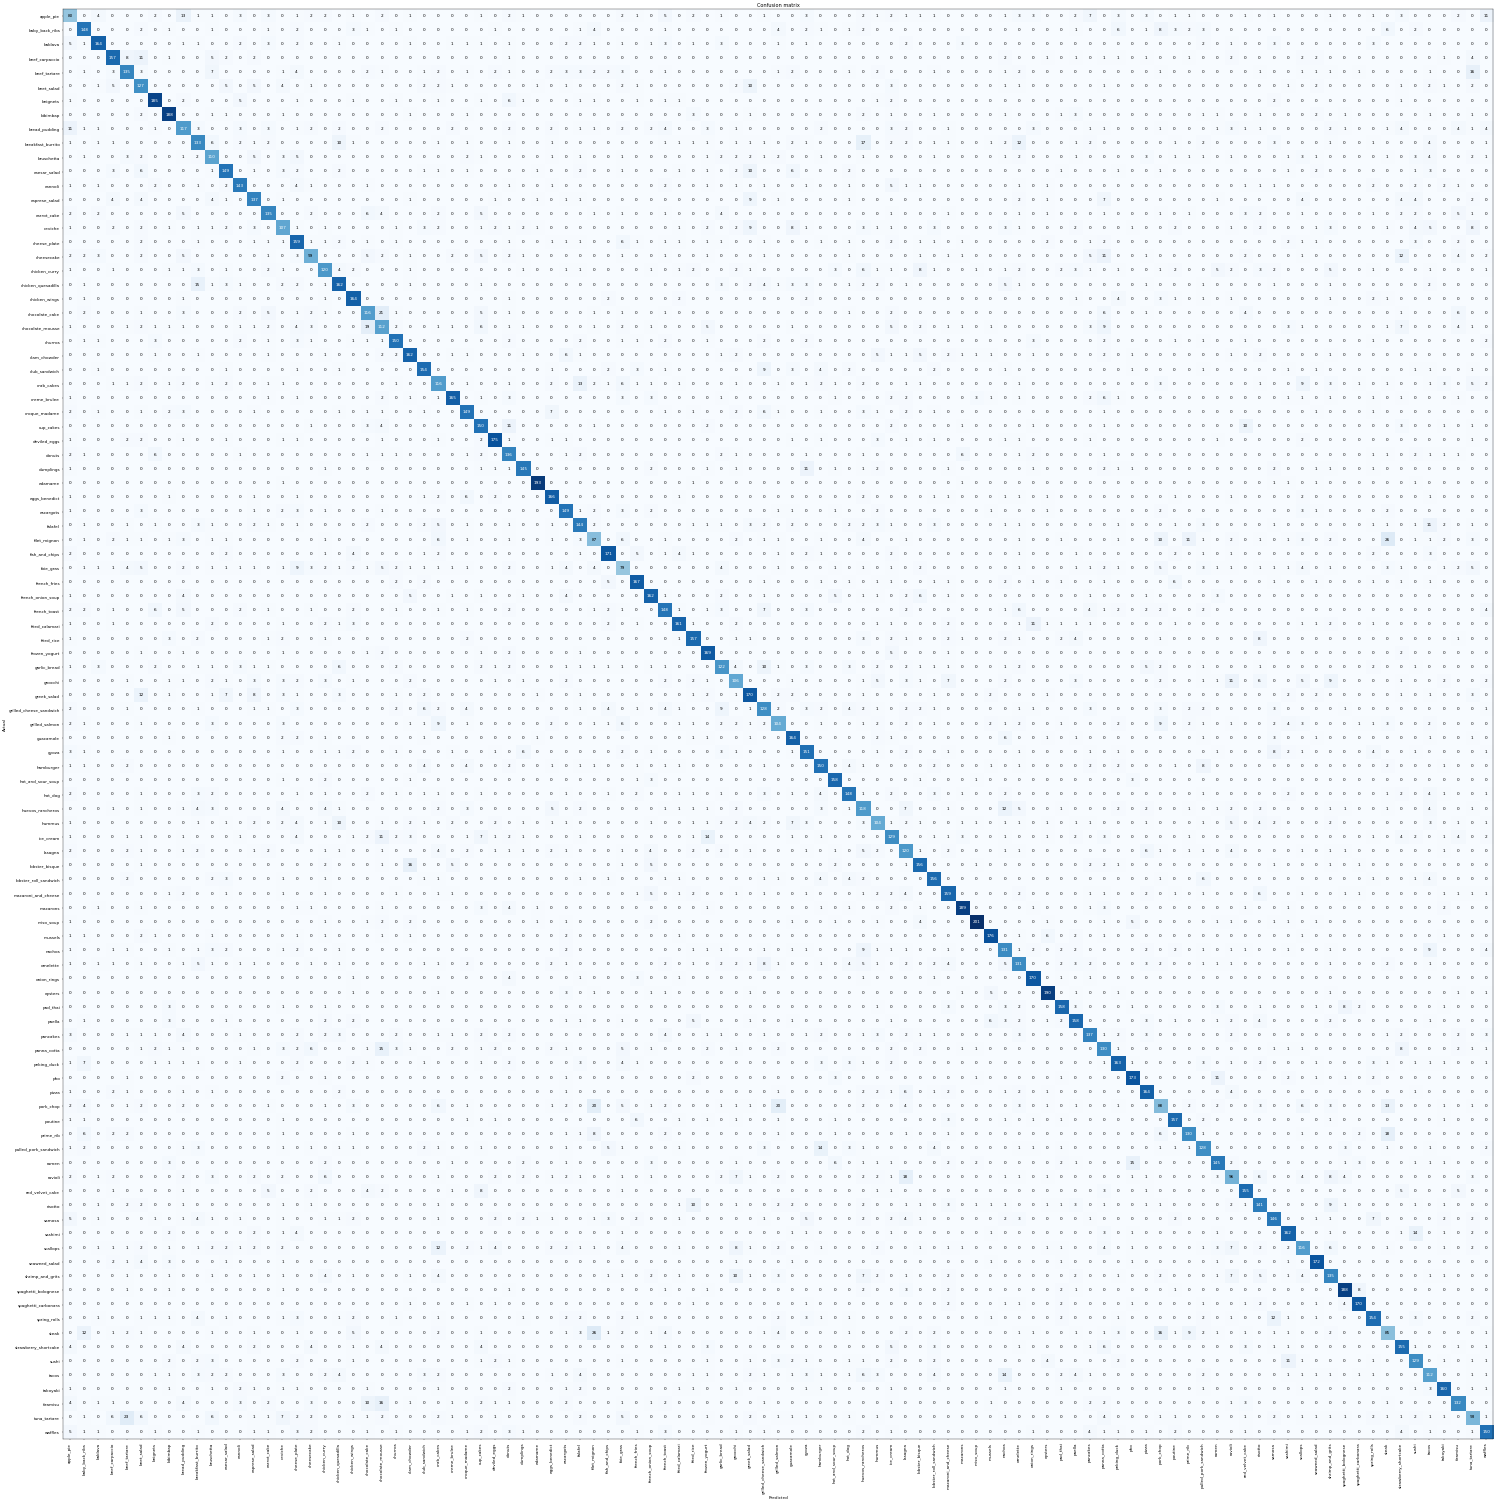

In [26]:
interp.plot_confusion_matrix(figsize=(50,50), dpi=30)

<p style="color: darkblue">Para entender mejor las confusiones más comunes de mi modelo, utilizo el método most_confused

In [27]:
interp.most_confused(min_val=2)

[('filet_mignon', 'steak', 26),
 ('steak', 'filet_mignon', 26),
 ('tuna_tartare', 'beef_tartare', 23),
 ('chocolate_cake', 'chocolate_mousse', 21),
 ('pork_chop', 'filet_mignon', 20),
 ('pork_chop', 'grilled_salmon', 20),
 ('chocolate_mousse', 'chocolate_cake', 19),
 ('prime_rib', 'steak', 18),
 ('ravioli', 'lasagna', 18),
 ('breakfast_burrito', 'huevos_rancheros', 17),
 ('beef_tartare', 'tuna_tartare', 16),
 ('lobster_bisque', 'clam_chowder', 16),
 ('steak', 'pork_chop', 16),
 ('tiramisu', 'chocolate_mousse', 16),
 ('chicken_quesadilla', 'breakfast_burrito', 15),
 ('panna_cotta', 'chocolate_mousse', 15),
 ('ramen', 'pho', 15),
 ('ice_cream', 'frozen_yogurt', 14),
 ('pulled_pork_sandwich', 'hamburger', 14),
 ('sashimi', 'sushi', 14),
 ('tacos', 'nachos', 14),
 ('apple_pie', 'bread_pudding', 13),
 ('crab_cakes', 'falafel', 13),
 ('pork_chop', 'steak', 13),
 ('breakfast_burrito', 'omelette', 12),
 ('cheesecake', 'strawberry_shortcake', 12),
 ('greek_salad', 'beet_salad', 12),
 ('huevos_r

<p style="color: darkblue">Después de finalizar todo el proceso de entrenamiento y análisis de mi modelo, quiero guardar el modelo final para poder utilizarlo más adelante sin necesidad de volver a entrenarlo. Para ello, primero defino el nombre del modelo final

In [28]:
final_model_name = f'{model_name}-final'

<p style="color: darkblue">Utilizo una cadena de formato para incluir el nombre base del modelo (model_name) seguido de -final para indicar que es la versión final del modelo.

<p style="color: darkblue">Luego, guardo el modelo final

In [29]:
learn.save(final_model_name)

<h3><p style="color: darkblue">PRUEBAS CON DIFERENTES DATOS 

<p style="color: darkblue">Cargamos el modelo entrenado

In [30]:
learn.load(final_model_name);

<p style="color: darkblue">Esto me permite recuperar el estado del modelo exactamente como estaba al final del proceso de entrenamiento, sin necesidad de volver a entrenarlo.

<p style="color: darkblue">Luego, accedo a las clases del conjunto de datos utilizando

In [31]:
learn.data.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

<p style="color: darkblue">Primero, creo un nuevo ImageDataBunch a partir de las clases del conjunto de datos que ya tengo
<p style="color: darkblue">Luego, creo un nuevo modelo CNN utilizando ResNet-34 y el nuevo conjunto de datos data2. A continuación, cargo el modelo final que guardé previamente

In [32]:
data2 = ImageDataBunch.single_from_classes(path, data.classes
                                           , tfms=get_transforms()
                                           , size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load(final_model_name)

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (0 items)
[]...
Path: ../data/food-101/images
x: ImageItemList (0 items)
[]...
Path: ../data/food-101/images;

Valid: LabelList
y: CategoryList (0 items)
[]...
Path: ../data/food-101/images
x: ImageItemList (0 items)
[]...
Path: ../data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias

<p style="color: darkblue">Esto me permite reutilizar el modelo final entrenado con el nuevo ImageDataBunch que acabo de crear.

<p style="color: darkblue">Para verificar que todo está configurado correctamente, imprimo las clases del nuevo conjunto de datos y el número total de clase

In [33]:
data2.classes, data2.c

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  'gyoza',
  'hamburger',
  'hot_and_sour_soup',
  'hot_dog',
  'huevos_rancheros',
  'hummu

<p style="color: darkblue">Primero, defino la URL de una imagen de bibimbap

In [34]:
bibimbap_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Dolsot-bibimbap.jpg/1200px-Dolsot-bibimbap.jpg"

In [36]:
url = bibimbap_url

<p style="color: darkblue">Creo una función llamada fetch_image para obtener la imagen desde la URL<p style="color: darkblue">

In [37]:
def fetch_image(url):
    response = requests.get(url)
    img = open_image(BytesIO(response.content))
    return img

<p style="color: darkblue">Esta función envía una solicitud GET a la URL, convierte el contenido de la respuesta en una imagen utilizando BytesIO y open_image, y luego devuelve la imagen.

<p style="color: darkblue">Utilizo la función fetch_image para obtener la imagen del bibimbap desde la URL
<p style="color: darkblue">Esto me devuelve la clase predicha (pred_class), el índice de la clase predicha (pred_idx) y las salidas del modelo (outputs).

<p style="color: darkblue">Finalmente, imprimo la clase predicha, el índice de la clase y las salidas

In [38]:
img = fetch_image(bibimbap_url)
pred_class,pred_idx,outputs = learn.predict(img)
pred_class , pred_idx, outputs

(Category bibimbap,
 tensor(7),
 tensor([7.9646e-07, 4.5580e-06, 1.5296e-06, 1.2509e-06, 8.7913e-06, 2.4522e-04,
         4.5393e-07, 9.5558e-01, 1.7174e-06, 3.3974e-06, 7.6976e-07, 6.4425e-04,
         3.2325e-07, 1.1164e-06, 7.3624e-06, 8.5419e-05, 7.8974e-07, 3.9314e-07,
         7.9545e-04, 4.2051e-06, 1.4746e-06, 1.8886e-05, 3.5605e-04, 1.1198e-06,
         1.6324e-05, 2.4728e-06, 1.6591e-05, 7.6081e-06, 1.4518e-06, 1.5057e-05,
         2.5960e-06, 5.3018e-07, 5.1174e-04, 1.7958e-05, 1.9048e-07, 1.6904e-04,
         2.7631e-04, 5.3418e-05, 2.0619e-06, 3.5094e-06, 1.8902e-06, 6.2659e-05,
         2.5408e-07, 1.4159e-06, 6.8474e-04, 2.4911e-04, 2.1151e-07, 3.5693e-05,
         3.0563e-04, 2.1286e-06, 2.2200e-05, 1.9116e-02, 1.7199e-06, 4.7683e-06,
         2.4722e-05, 1.1216e-06, 2.2922e-04, 1.0237e-03, 1.2317e-05, 1.7914e-06,
         9.4212e-06, 5.8267e-07, 1.8509e-04, 4.4426e-07, 1.4893e-04, 1.1100e-04,
         2.5303e-05, 1.7505e-05, 1.8094e-07, 9.3376e-07, 9.4870e-05, 3.3305e-

<p style="color: darkblue">Primero, defino una función predict para hacer predicciones sobre una imagen desde una URL:

In [39]:
def predict(url):
    img = fetch_image(url)
    pred_class,pred_idx,outputs = learn.predict(img)
    res =  zip (learn.data.classes, outputs.tolist())
    predictions = sorted(res, key=lambda x:x[1], reverse=True)
    top_predictions = predictions[0:5]
    pprint.pprint( top_predictions)
    return img.resize(500)

<p style="color: darkblue">BABY BACK RIB

<p style="color: darkblue">Esto hace una predicción sobre la imagen de las costillas Baby Back y muestra las 5 clases principales junto con sus probabilidades.

<p style="color: darkblue">En este caso, las predicciones principales son

In [40]:
baby_back_url ="https://upload.wikimedia.org/wikipedia/commons/e/ee/Baby_back_ribs_with_fries.jpg"

[('baby_back_ribs', 0.9650635123252869),
 ('steak', 0.012990925461053848),
 ('prime_rib', 0.007605507038533688),
 ('pulled_pork_sandwich', 0.006499087437987328),
 ('filet_mignon', 0.004123234655708075)]


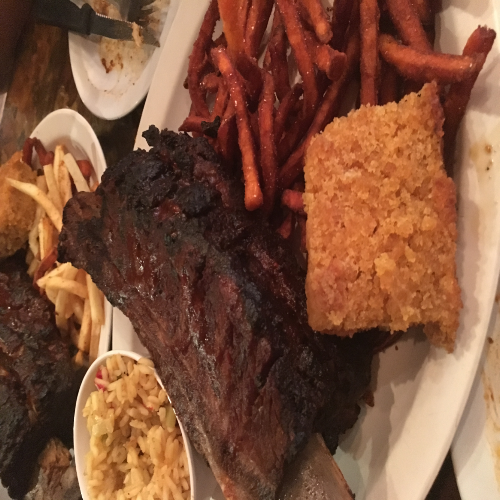

In [41]:
predict(baby_back_url)

<p style="color: darkblue">CAT

In [42]:
cat_image_url = "https://cdn.pixabay.com/photo/2017/02/20/18/03/cat-2083492__480.jpg"

[('ice_cream', 0.3782033324241638),
 ('chocolate_cake', 0.08955799788236618),
 ('chocolate_mousse', 0.04329700767993927),
 ('mussels', 0.03845462203025818),
 ('macarons', 0.02809390425682068)]


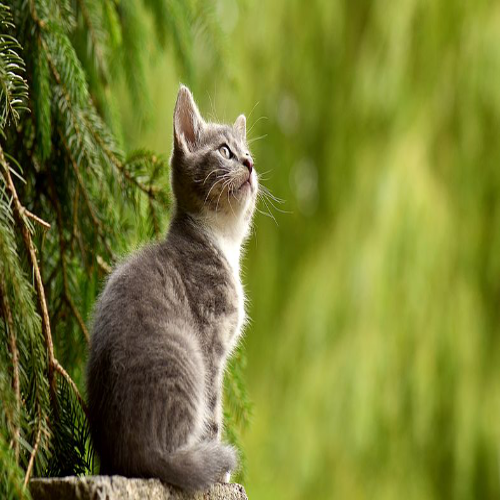

In [43]:
predict(cat_image_url)

<p style="color: darkblue">ICE CREAM

In [44]:
icecream_url = "https://upload.wikimedia.org/wikipedia/commons/3/31/Ice_Cream_dessert_02.jpg"

[('ice_cream', 0.5547614097595215),
 ('frozen_yogurt', 0.3315564692020416),
 ('waffles', 0.039060063660144806),
 ('apple_pie', 0.03056148812174797),
 ('chocolate_mousse', 0.024716483429074287)]


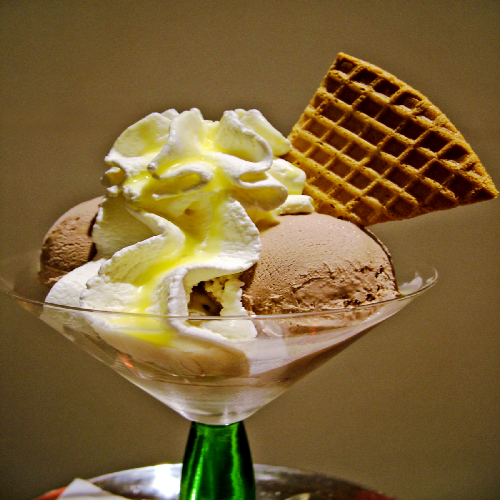

In [45]:
predict(icecream_url)

<p style="color: darkblue">BANANA

In [46]:
banana_url = "https://upload.wikimedia.org/wikipedia/commons/d/de/Bananavarieties.jpg"

[('foie_gras', 0.37437957525253296),
 ('cheese_plate', 0.24696765840053558),
 ('caprese_salad', 0.04831501841545105),
 ('samosa', 0.037014905363321304),
 ('peking_duck', 0.03170013427734375)]


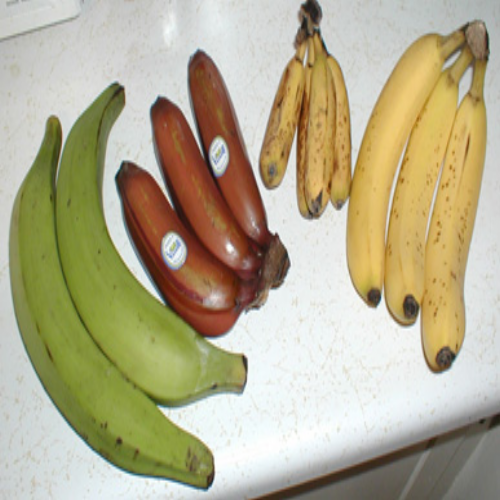

In [47]:
predict(banana_url)